# Naive Bayes Classifier from Scratch

## 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## 2. Reading Dataset

In [3]:
data_file = pd.read_csv("Datasets/Breast_cancer_data.csv")
data_file.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


## 3. Exploratory Data Analysis

Number of 0's in diagnosis:  212
Number of 1's in diagnosis:  357


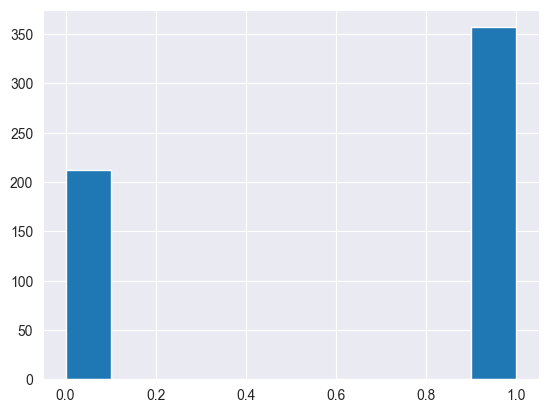

In [4]:
data_file["diagnosis"].hist()

diagnosis0_count = 0
diagnosis1_count = 0
for x in data_file["diagnosis"]:
    if x == 0:
        diagnosis0_count += 1
    elif x == 1:
        diagnosis1_count += 1

print("Number of 0's in diagnosis: ", diagnosis0_count)
print("Number of 1's in diagnosis: ", diagnosis1_count)

<Axes: >

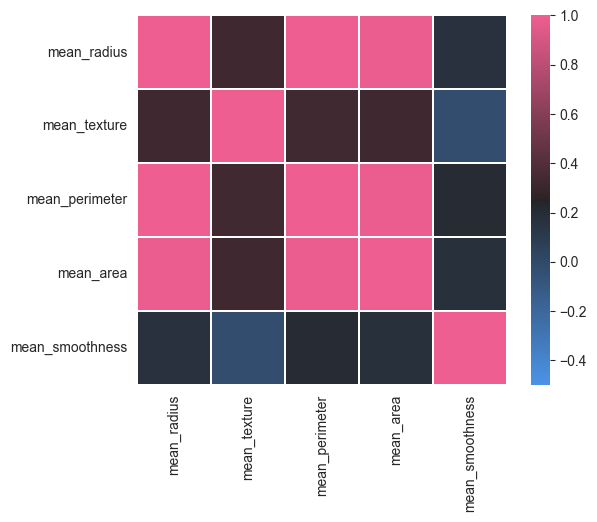

In [5]:
correlation = data_file.iloc[:,:-1].corr(method = "pearson")
cmap = sns.diverging_palette(250,354,80,60, center = 'dark', as_cmap = True)
sns.heatmap(correlation, vmax = 1, vmin = -.5, cmap = cmap, square = True, linewidths = .2)

## 4. Excluding features with high correlation

In [6]:
data_file = data_file[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data_file.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


## 5. Feature Histograms

<Axes: xlabel='mean_smoothness', ylabel='Count'>

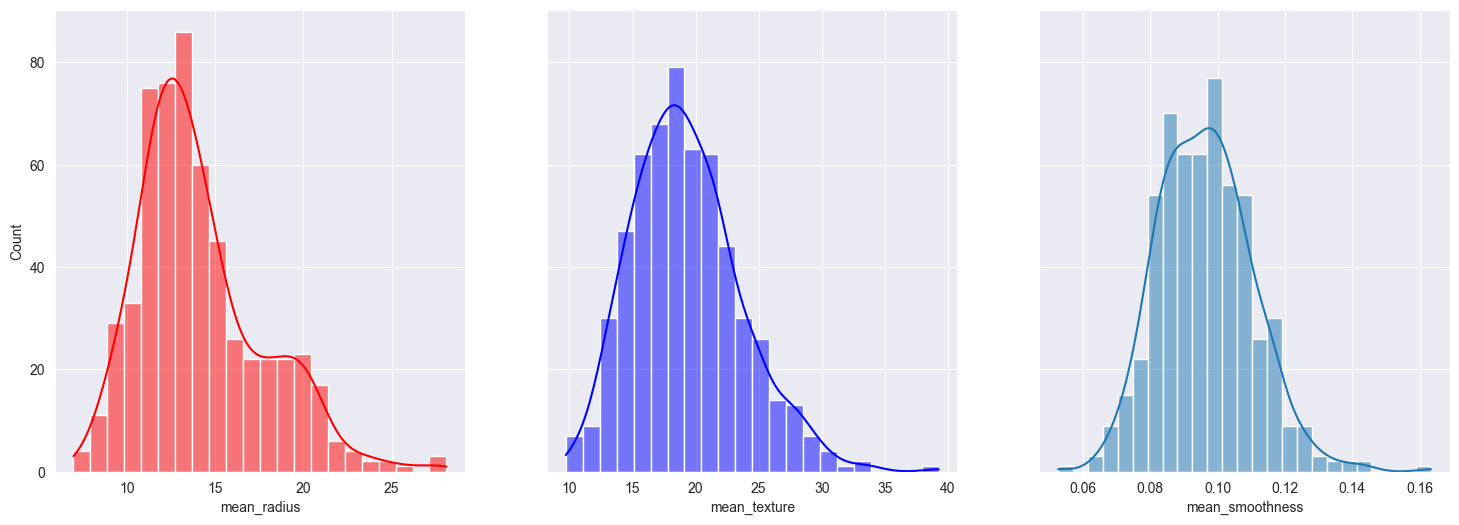

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (18,6), sharey = True)

sns.histplot(data_file, ax = axes[0], x = "mean_radius", kde = True, color = 'r')
sns.histplot(data_file, ax = axes[1], x = "mean_texture", kde = True, color = 'b')
sns.histplot(data_file, ax = axes[2], x = "mean_smoothness", kde = True)

## 6. Calculating P(Y = y) for all possible y values

In [9]:
def calculate_prior(df, Y):
    # classes = values in the "diagnosis"(Y)
    # So, classes = 0,1
    classes = sorted(list(df[Y].unique()))
     
    #Empty list for the prior values 
    prior = []

    # For i in 0,1
    for i in classes:
        prior.append(len(df[df[Y] == i]) / len(df))
        """
        For i = 0, 
            length(datafile[datafile["diagnosis"] == 0]) / length(datafile)
                    -> This means the number of 0's found in "diagnosis"
                        divided by the total number of values in "diagnosis"
                     = 212 / 569    =   0.3725
        For i = 1,
            same as above, but for the number of 1's found in "diagnosis"
                     = 357 / 569    =   0.6274
        """

    return prior



## 7. Approach 1: Calculate P(X = x|Y = y) using Gaussian distribution

Likelihood: P(X = x0,x1,x2|Y = y)



In [11]:
def calculate_likelihood_gaussian(df, feat_name, feat_value, Y, label):
    #Creating a list of the features in df(data_file)
    feat = list(df.columns)
    
    df = df[df[Y] == label]

    #Take the values in the columns of each of the features(radius, texture, smoothness)
    # and calculate the mean and standard deviation of each
    mean, std = df[feat_name].mean(), df[feat_name].std()

    prob_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_value - mean) ** 2 / (2 * std**2)))

    return prob_x_given_y

## 8. Calculate P(X = x1|Y = y) P(X = x2|y = y) P(X = xn|Y = y) * P(Y = y) for all y and find the maximum

In [15]:
def naive_bayes_gaussian(df, X, Y):
    #Gets feature names excluding the last column
    features = list(df.columns)[:-1]

    #Calculates prior
    prior = calculate_prior(df, Y)

    Y_pred = []

    #Loops over every data sample
    for x in X:
        #Calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1] * len(labels)

        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        post_prob = [1] * len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)            
